In [1]:
#导入库
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
import os

#生成Output文件夹，删除掉Output文件夹下dispersion_ph文件夹
os.system('mkdir Output')
os.system('rm -rf ./Output/dispersion_ph')
#设定内插的x值
periods = np.array([8,10,12,14,16,18,20,22,24,26,28,30,32,35,40,45,50])
#对文件名字进行排序
files = os.listdir("./Input/InputPhaseData/")
files.sort(key =lambda x:int(x[:-4]))
print(files)

['8.dat', '10.dat', '12.dat', '14.dat', '16.dat', '18.dat', '20.dat', '22.dat', '24.dat', '26.dat', '28.dat', '30.dat', '32.dat', '35.dat', '40.dat', '45.dat', '50.dat', '55.dat', '60.dat', '65.dat', '70.dat']


In [2]:
#参数声明：period 输入文件名的序号、temp 输入文件名的分开表示、lines输入文件的内容、key输入数据的
#          经纬度信息（保留两位）、dispersion保存文件的序号，速度和误差、x 文件的序号、y 文件的速度、z 文件的误差
#          vel_new 通过插值的新的速度、error_new 通过插值的新的误差、periods 设定的插值数组、key_all 数据中所有的
#          经纬度信息
#设定一个元组保存
dispersion = {}
#遍历file文件
for file in files:
    if(file[-4:] == '.dat'):
        #split保存在数组里
        temp = file.split('.')
        #print(temp)
        period = temp[0]
        #print(period,file)
        #loadtxt把内容保存在数组里,返回值也是数组
        lines = np.loadtxt('./Input/InputPhaseData/' + period + '.dat')
        #print(lines)
        #对每一个数据进行遍历
        for line in lines:
            lon,lat,vel,error= line[0],line[1],line[2],line[3]
            #print(lon,lat,vel)
            #将数据都用浮点数表示出来
            error = float(line[3])
            key = "%.2f"%lat + "_" +"%.2f"%lon
            #print(key)
            if key in dispersion:
                dispersion[key].append([float(period),float(vel),float(error)])
            else:
                dispersion[key]=[[float(period),float(vel),float(error)]]
            #print(dispersion[key])
key_all = []
count = 0
for key in dispersion:
    a = np.array(dispersion[key])
    x = a[:,0];y = a[:,1];z = a[:,2]
    #print(x)
    if abs(len(periods) - len(x)) < 5:
        key_all.append(key)
        count = count + 1
        
        #此方法可外插值
        f1 = InterpolatedUnivariateSpline(x,y,k=1)
        f2 = InterpolatedUnivariateSpline(x,z,k=1)
        
        #生成新的速度和误差
        vel_new = f1(periods)
        error_new = f2(periods)
        #plt.plot(periods,vel_new,'o')
        #plt.pauce(0.5)
        #plt.clf()
        with open('./Output/dispersion_ph/' + key + '.txt' ,'w') as f:
            for i in np.arange(len(periods)):
                f.write('{} \t {:.3f} \t {:.4f} \n'.format(periods[i],vel_new[i],error_new[i]))
print(count,key)
print("OK Return")
            

4901 23.00_98.50
OK Return


4901


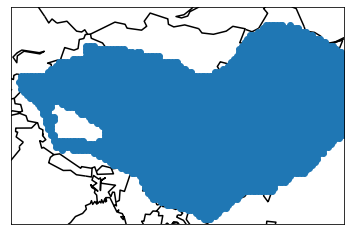

In [3]:
#用basemap成图,测试数据的覆盖范围
from mpl_toolkits.basemap import Basemap
fig = plt.figure(5)
m = Basemap(projection = 'mill', llcrnrlon = 73,llcrnrlat = 18,urcrnrlon = 135,urcrnrlat = 53)
m.drawcoastlines(linewidth = 1.5)
m.drawcountries(linewidth = 1.5)
count = 0
lat_all = []
lon_all = []
for i in key_all:
    count = count + 1
    lat,lon = i.split('_')
    lat_all.append(float(lat))
    lon_all.append(float(lon))
lon_all,lat_all =m(lon_all,lat_all)
print(count)
plt.plot((lon_all),(lat_all),'o')